In [31]:
from sklearn.datasets import make_circles

# Make 1000 samples 
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same values

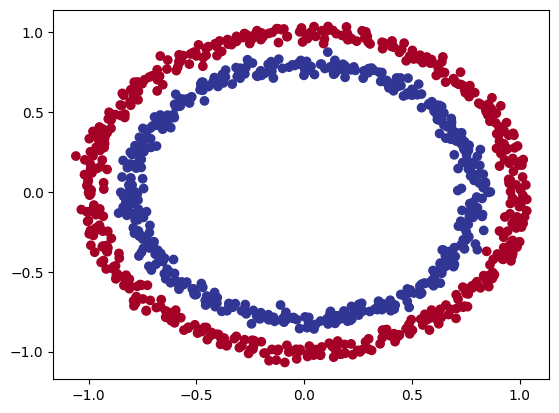

In [32]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu);

In [33]:
## Convert to tensor and spliting data 
from sklearn.model_selection import train_test_split
import torch

X_t = torch.from_numpy(X).type(torch.float)
y_t = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, 
                                                    random_state=0, 
                                                    test_size=0.2,
                                                    shuffle=True)

In [15]:
# Standard PyTorch imports
import torch

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

In [16]:
## Declare the model
from torch import nn

class CircleClassi(nn.Module):
    def __init__(self):
        super().__init__()
        # Create 2 linear layers
        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)

    def forward(self, x):
        return self.layer_2(self.layer_1(x))

In [21]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [39]:
torch.manual_seed(42)

circle_model = CircleClassi()
circle_model.to(device)

## Set up function and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=circle_model.parameters(), lr=0.1)

## Training model
epochs = 100
for epoch in range(epochs):
    # Enable training mode
    circle_model.train()

    # 1. Forward pass
    y_logits = circle_model(X_train.to(device)).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # 2. Evaluate loss and accuracy
    loss = loss_fn(y_logits, y_train.to(device))
    acc = accuracy_fn(y_train.to(device), y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ## Tesing
    circle_model.eval()
    with torch.inference_mode():
        # 1. Forwards pass
        test_logits = circle_model(X_test.to(device)).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # 2. Calculate accuracy and loss
        test_loss = loss_fn(test_logits, y_test.to(device))
        test_acc = accuracy_fn(y_test.to(device), test_pred)

    # Print out
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69894, Accuracy: 48.00% | Test loss: 0.68492, Test acc: 58.00%
Epoch: 10 | Loss: 0.69507, Accuracy: 45.00% | Test loss: 0.68995, Test acc: 48.00%
Epoch: 20 | Loss: 0.69362, Accuracy: 49.62% | Test loss: 0.69382, Test acc: 49.00%
Epoch: 30 | Loss: 0.69303, Accuracy: 51.62% | Test loss: 0.69647, Test acc: 52.00%
Epoch: 40 | Loss: 0.69277, Accuracy: 53.37% | Test loss: 0.69820, Test acc: 48.00%
Epoch: 50 | Loss: 0.69262, Accuracy: 54.25% | Test loss: 0.69933, Test acc: 47.50%
Epoch: 60 | Loss: 0.69253, Accuracy: 55.88% | Test loss: 0.70006, Test acc: 47.00%
Epoch: 70 | Loss: 0.69246, Accuracy: 58.13% | Test loss: 0.70056, Test acc: 46.00%
Epoch: 80 | Loss: 0.69241, Accuracy: 60.88% | Test loss: 0.70090, Test acc: 49.00%
Epoch: 90 | Loss: 0.69237, Accuracy: 61.38% | Test loss: 0.70114, Test acc: 50.50%


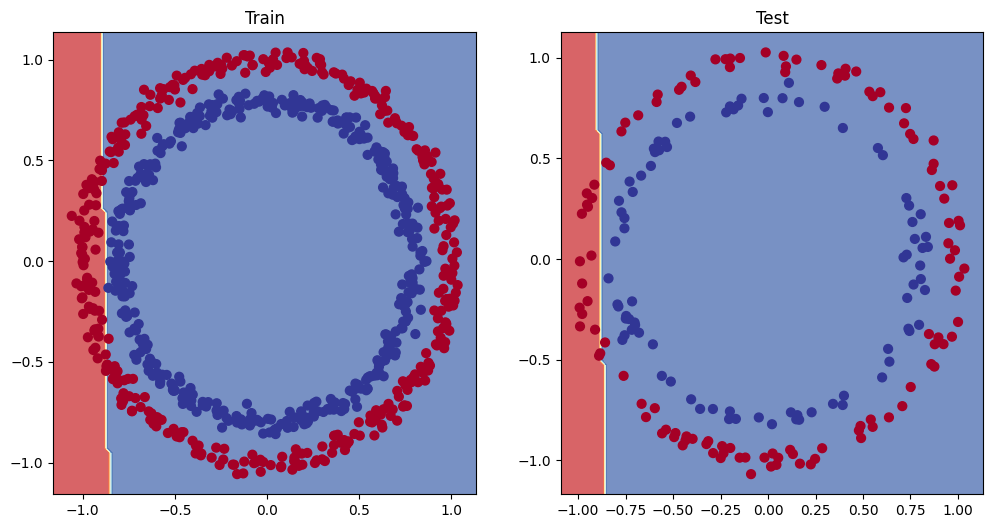

In [45]:
## Visualize prediction
from helper_functions import plot_predictions, plot_decision_boundary

# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(circle_model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(circle_model, X_test, y_test)